In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score ,mean_squared_error
import os

In [3]:
def d(x):
    display(x)

In [5]:
cv = pd.read_csv('resume_data.csv')

In [7]:
cv.head(5)

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [96]:
cv

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,NaN,NaN,"['Mathematical modelling', 'Machine Learning',...",['Sanghvi College of Engineering'],['B.Tech'],['2019'],['N/A'],['N/A'],['N/A'],['BPM Foundation'],...,NaN,NaN,NaN,Data Engineer,Bachelor of Science (BSc),5 to 8 years,NaN,Data Platform Design\nData Pipeline Developmen...,Azure\nBig Data\nData Analytics\nETL Tools\nPo...,0.683333
9540,NaN,Expertise EDA modeler. I like to learn what my...,"['Data Analysis', 'Business Analysis', 'Machin...","['KVoCT, Pune', 'KVoCT, Pune']","['B.CA', 'M.CA']","['2018', '2020']","[None, None]","[None, None]","[None, None]",['Passionate Solution'],...,NaN,NaN,NaN,Executive/ Sr. Executive -IT,Bachelor of Science (BSc) in Computer Science ...,3 to 5 years,Age at most 40 years,Hardware & Software Installation\nSystem Monit...,NaN,0.650000
9541,NaN,Looking for roles related to application devel...,"['Business Analyst', 'Data Analytics', 'Data C...",['PGG College Mysore'],['B.BA'],['2019'],['N/A'],['N/A'],['N/A'],['ZigSAW'],...,NaN,NaN,NaN,Executive - VAT,BBA in Accounting and Finance,1 to 3 years,NaN,Mushak Forms Maintenance\nVAT Software & MS Of...,VAT and Tax,0.650000
9542,NaN,NaN,"['Machine Learning', 'Natural Language Process...","['Rajiv Gandhi Me

In [9]:
ps = pd.read_csv('postings.csv')

In [10]:
ps.head(5)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [19]:
cv = pd.read_csv("resume_data.csv")
ps = pd.read_csv("postings.csv")
cv.head(5)
ps.head(5)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [16]:
print(cv.columns)
print(ps.columns)

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')
Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary

In [106]:
cv_texts = cv["career_objective"]
ps_texts = ps["description"]

In [21]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('turkish'))

def temizle(metin):
    if isinstance(metin, str):
        metin = metin.lower()  # Küçük harfe çevir
        metin = re.sub(r'[^\w\s]', '', metin)  # Noktalama kaldır
        kelimeler = metin.split()  # Kelimelere ayır
        temiz_kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]
        return " ".join(temiz_kelimeler)
    else:
        return ""

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
cv_cleaned = cv_texts.apply(temizle)
ps_cleaned = ps_texts.apply(temizle)

In [112]:
for i in range(2):
    print("Orijinal CV:", cv_texts.iloc[i])
    print("Temizlenmiş CV:", cv_cleaned.iloc[i])
    print("-" * 40)
    print("Orijinal İlan:", ps_texts.iloc[i])
    print("Temizlenmiş İlan:", ps_cleaned.iloc[i])
    print("=" * 60)

Orijinal CV: Big data analytics working and database warehouse manager with robust experience in handling all kinds of data. I have also used multiple cloud infrastructure services and am well acquainted with them. Currently in search of role that offers more of development.
Temizlenmiş CV: big data analytics working and database warehouse manager with robust experience in handling all kinds of data i have also used multiple cloud infrastructure services and am well acquainted with them currently in search of role that offers more of development
----------------------------------------
Orijinal İlan: Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation fo

In [23]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# CV metinlerini birleştir
cv_birlesik = " ".join(cv_cleaned)

# İş ilanı metinlerini birleştir
ps_birlesik = " ".join(ps_cleaned)

# Kelime bulutlarını oluştur
kelime_bulutu_cv = WordCloud(width=800, height=400, background_color='white', font_path='arial').generate(cv_birlesik)
kelime_bulutu_ps = WordCloud(width=800, height=400, background_color='white', font_path='arial').generate(ps_birlesik)

# Görselleştir
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(kelime_bulutu_cv, interpolation='bilinear')
plt.axis('off')
plt.title("CV Metinleri – Kelime Bulutu")

plt.subplot(1, 2, 2)
plt.imshow(kelime_bulutu_ps, interpolation='bilinear')
plt.axis('off')
plt.title("İş İlanı Metinleri – Kelime Bulutu")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tum_metinler = cv_cleaned.tolist() + ps_cleaned.tolist()
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tum_metinler)

cv_tfidf = tfidf_matrix[:len(cv_cleaned)]
ps_tfidf = tfidf_matrix[len(cv_cleaned):]

In [120]:
print(tfidf_matrix.shape)

(133393, 710419)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(cv_tfidf, ps_tfidf)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(cv_tfidf.shape[0]):
    skorlar = cosine_similarity(cv_tfidf[i], ps_tfidf)  # Tek CV için tüm ilanlara karşı
    en_iyi_indeks = skorlar.argmax()
    en_iyi_skor = skorlar[0][en_iyi_indeks]

    print(f"CV #{i+1} en iyi {en_iyi_indeks+1}. iş ilanı ile eşleşti (Benzerlik Skoru: {en_iyi_skor:.2f})")
    print("CV:", cv_cleaned.iloc[i][:200], "...")
    print("İlan:", ps_cleaned.iloc[en_iyi_indeks][:200], "...")
    print("=" * 80)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(cv_tfidf.shape[0]):
    skorlar = cosine_similarity(cv_tfidf[i], ps_tfidf)  # Tek CV için
    en_iyi_indeks = skorlar.argmax()
    en_iyi_skor = skorlar[0][en_iyi_indeks]

    print(f"CV #{i+1} en iyi {en_iyi_indeks+1}. iş ilanı ile eşleşti (Benzerlik Skoru: {en_iyi_skor:.2f})")
    print("CV:", cv_cleaned.iloc[i][:200], "...")
    print("İlan:", ps_cleaned.iloc[en_iyi_indeks][:200], "...")
    print("=" * 80)

CV #1 en iyi 65356. iş ilanı ile eşleşti (Benzerlik Skoru: 0.29)
CV: big data analytics working and database warehouse manager with robust experience in handling all kinds of data i have also used multiple cloud infrastructure services and am well acquainted with them  ...
İlan: job title senior data engineerlocation bentonville ar remote is finejob type contract job description key points location this position will be based in bentonville ar you can submit remote as well if ...
CV #2 en iyi 23983. iş ilanı ile eşleşti (Benzerlik Skoru: 0.39)
CV: fresher looking to join as a data analyst and junior data scientist experienced in creating meaningful data dashboards and evaluation models ...
İlan: job title enterprise data modeler architectlocation hybride mentor ohjob type contract to hire job description position summary the enterprise data modelerarchitect is responsible for architecting des ...
CV #3 en iyi 1. iş ilanı ile eşleşti (Benzerlik Skoru: 0.00)
CV:  ...
İlan: job descriptio

In [ ]:
if en_iyi_skor > 0.0:
    print(...)  # Yazdır
else:
    print(f"CV #{i+1} eşleşme bulunamadı (Boş/Anlamsız içerik).")

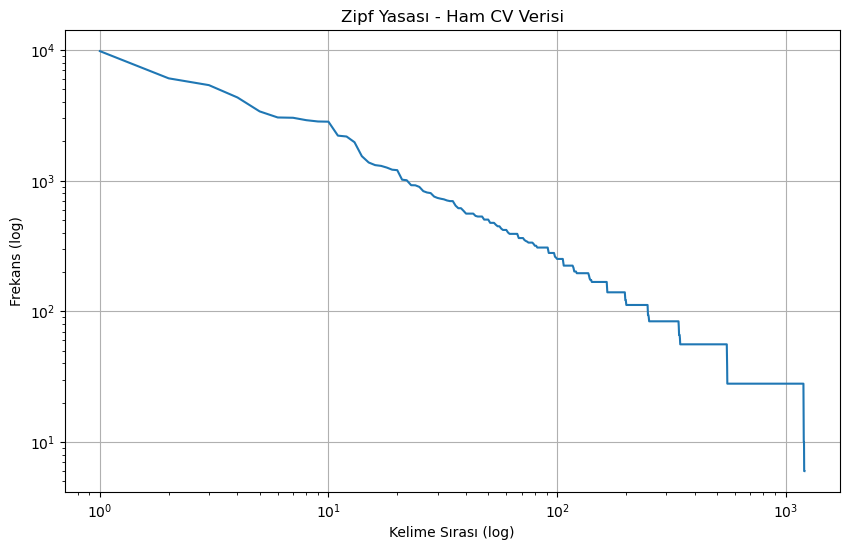

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import re

# CV verisini yükle
cv = pd.read_csv("resume_data.csv")

# Ham metin sütunu: career_objective
text = ' '.join(cv['career_objective'].dropna().astype(str).tolist()).lower()

# Noktalama ve sayıları temizle
text = re.sub(r'[^a-zA-Z\s]', '', text)

# Tokenize et
words = text.split()

# Kelime frekanslarını hesapla
word_freq = Counter(words)

# Frekansları sırala
sorted_freqs = sorted(word_freq.values(), reverse=True)

# Rank ve frekansları log-log eksende göster
ranks = np.arange(1, len(sorted_freqs) + 1)
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_freqs)
plt.title("Zipf Yasası - Ham CV Verisi")
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.grid(True)
plt.show()

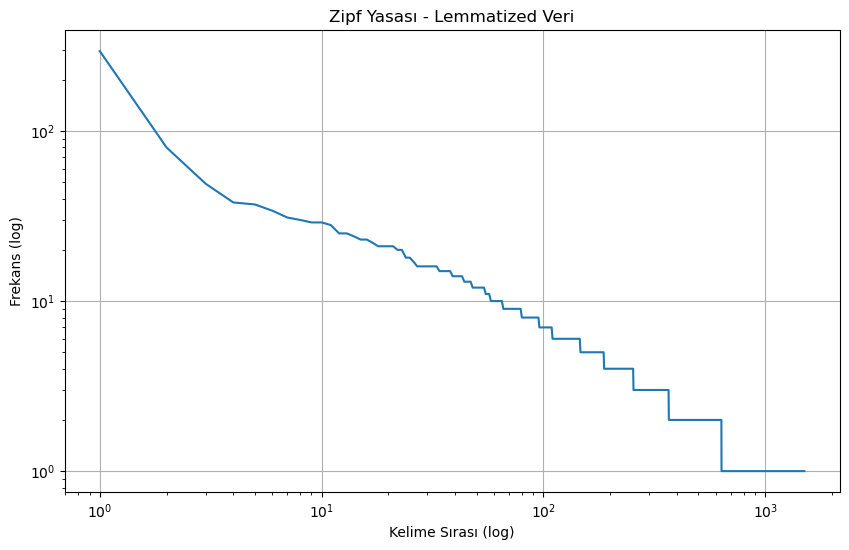

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Lemmatized cümleleri yükle
lemmatized = pd.read_csv("lemmatized_sentences.csv", header=None)
all_tokens = ' '.join(lemmatized[0].dropna().astype(str).tolist()).split()

# Kelime frekanslarını hesapla
word_freq = Counter(all_tokens)
sorted_freqs = sorted(word_freq.values(), reverse=True)

# Log-log eksende çizim
ranks = np.arange(1, len(sorted_freqs) + 1)
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_freqs)
plt.title("Zipf Yasası - Lemmatized Veri")
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.grid(True)
plt.show()

In [37]:
import os
print(os.getcwd())

C:\Users\Yusuf


In [ ]:
import csv

# Lemmatized cümleleri .csv dosyasına kaydet
with open("C:/Users/Yusuf/lemmatized_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    for tokens in tokenized_corpus_lemmatized:
        writer.writerow([' '.join(tokens)])

In [ ]:
pip install wikipedia-api
import wikipedia
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Gerekli kaynakları indir
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Wikipedia sayfasını al
page = wikipedia.page("Python (programming language)")
text = page.content
sentences = sent_tokenize(text)

# Stopword ve lemmatizer ayarları
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Lemmatization işlemi
tokenized_corpus_lemmatized = []

for sentence in sentences:
    tokens = word_tokenize(sentence)
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    tokenized_corpus_lemmatized.append(lemmatized_tokens)

In [63]:
import wikipedia
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Gerekli kaynakları indir
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Wikipedia sayfasını al
page = wikipedia.page("Python (programming language)")
text = page.content
sentences = sent_tokenize(text)

# Stopword ve lemmatizer ayarları
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Lemmatization işlemi
tokenized_corpus_lemmatized = []

for sentence in sentences:
    tokens = word_tokenize(sentence)
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    tokenized_corpus_lemmatized.append(lemmatized_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [45]:
import wikipedia
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Gerekli kaynakları indir
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Wikipedia sayfasını al
page = wikipedia.page("Python (programming language)")
text = page.content
sentences = sent_tokenize(text)

# Stopword ve lemmatizer ayarları
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Lemmatization işlemi
tokenized_corpus_lemmatized = []

for sentence in sentences:
    tokens = word_tokenize(sentence)
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    tokenized_corpus_lemmatized.append(lemmatized_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [49]:
import csv

with open("C:/Users/Yusuf/lemmatized_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    for tokens in tokenized_corpus_lemmatized:
        writer.writerow([' '.join(tokens)])

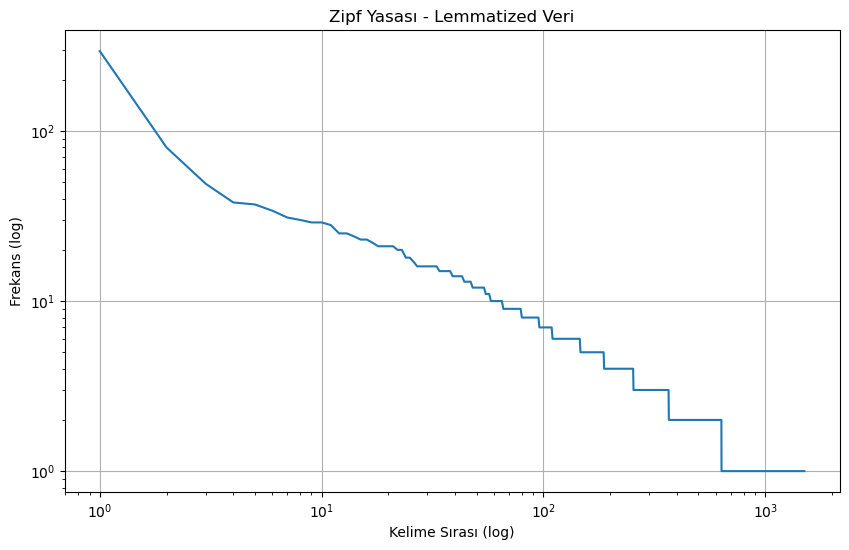

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Lemmatized cümleleri yükle
lemmatized = pd.read_csv("lemmatized_sentences.csv", header=None)
all_tokens = ' '.join(lemmatized[0].dropna().astype(str).tolist()).split()

# Kelime frekanslarını hesapla
word_freq = Counter(all_tokens)
sorted_freqs = sorted(word_freq.values(), reverse=True)

# Log-log eksende çizim
ranks = np.arange(1, len(sorted_freqs) + 1)
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_freqs)
plt.title("Zipf Yasası - Lemmatized Veri")
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.grid(True)
plt.show()

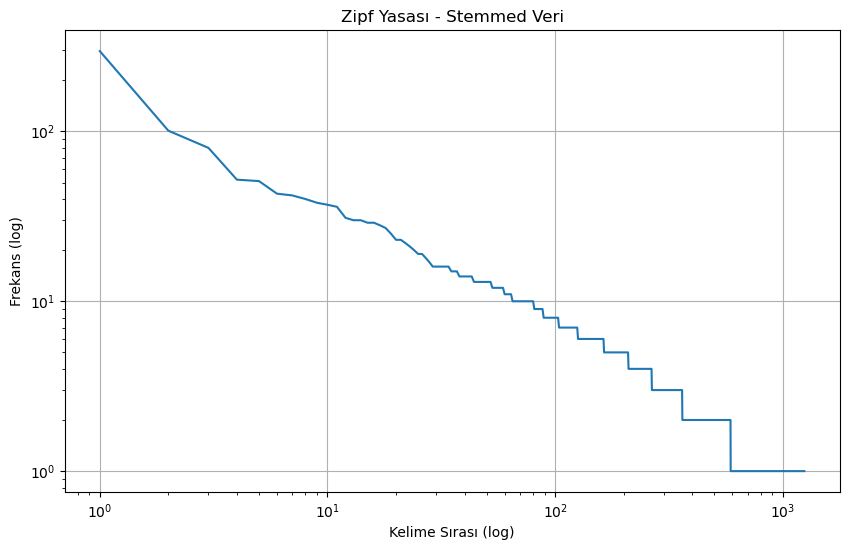

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Stemmed dosyayı oku
stemmed = pd.read_csv("C:/Users/Yusuf/stemmed_sentences.csv", header=None)

# Tüm cümleleri birleştirip kelimelere ayır
all_tokens = ' '.join(stemmed[0].dropna().astype(str).tolist()).split()

# Frekansları hesapla
word_freq = Counter(all_tokens)
sorted_freqs = sorted(word_freq.values(), reverse=True)

# Zipf grafiğini çiz
ranks = np.arange(1, len(sorted_freqs) + 1)
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_freqs)
plt.title("Zipf Yasası - Stemmed Veri")
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.grid(True)
plt.show()

In [53]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import wikipedia

# Gerekli indirmeler
nltk.download('punkt')
nltk.download('stopwords')

# Veri ve araçlar
page = wikipedia.page("Python (programming language)")
text = page.content
sentences = nltk.sent_tokenize(text)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Stemleme
tokenized_corpus_stemmed = []

for sentence in sentences:
    tokens = word_tokenize(sentence)
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    tokenized_corpus_stemmed.append(stemmed_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
import csv

with open("C:/Users/Yusuf/stemmed_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    for tokens in tokenized_corpus_stemmed:
        writer.writerow([' '.join(tokens)])

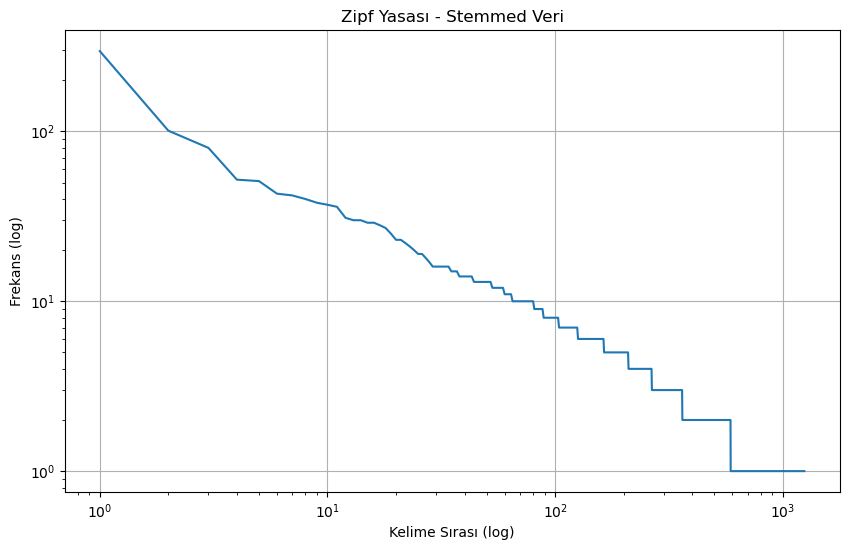

In [59]:
stemmed = pd.read_csv("C:/Users/Yusuf/stemmed_sentences.csv", header=None)
all_tokens = ' '.join(stemmed[0].dropna().astype(str).tolist()).split()
word_freq = Counter(all_tokens)
sorted_freqs = sorted(word_freq.values(), reverse=True)
ranks = np.arange(1, len(sorted_freqs) + 1)
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_freqs)
plt.title("Zipf Yasası - Stemmed Veri")
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.grid(True)
plt.show()

In [61]:
import pandas as pd

# Dosyayı oku
lemmatized = pd.read_csv("C:/Users/Yusuf/lemmatized_sentences.csv", header=None)

# Her satırda boşlukla ayrılmış kelimeleri listeye dönüştür
sentences = lemmatized[0].dropna().astype(str).apply(lambda x: x.split()).tolist()

In [63]:
from gensim.models import Word2Vec

# CBOW modeli (sg=0)
cbow_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0, epochs=20)

In [65]:
cbow_model.save("cbow_lemmatized.model")

In [67]:
from gensim.models import Word2Vec

# Skip-Gram modeli (sg=1)
skipgram_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=1, epochs=20)

In [69]:
skipgram_model.save("skipgram_lemmatized.model")

In [71]:
from gensim.models import Word2Vec

In [73]:
lemmatized = pd.read_csv("C:/Users/Yusuf/lemmatized_sentences.csv", header=None)
lemmatized_sentences = lemmatized[0].dropna().astype(str).apply(lambda x: x.split()).tolist()

In [75]:
stemmed = pd.read_csv("C:/Users/Yusuf/stemmed_sentences.csv", header=None)
stemmed_sentences = stemmed[0].dropna().astype(str).apply(lambda x: x.split()).tolist()

In [77]:
# Model ayarları listesi
vector_sizes = [50, 100]
windows = [3, 5]
min_counts = [1, 2]
epochs = 20

# Model sayısı kontrolü için sayaç
model_no = 1

# Tüm parametre kombinasyonları için döngü
for vs in vector_sizes:
    for win in windows:
        for mc in min_counts:
            # ---- LEMMATIZED - CBOW ----
            model = Word2Vec(sentences=lemmatized_sentences, vector_size=vs, window=win, min_count=mc, sg=0, epochs=epochs)
            model.save(f"cbow_lemmatized_{model_no}.model")
            
            # ---- LEMMATIZED - SKIP-GRAM ----
            model = Word2Vec(sentences=lemmatized_sentences, vector_size=vs, window=win, min_count=mc, sg=1, epochs=epochs)
            model.save(f"skipgram_lemmatized_{model_no}.model")
            
            # ---- STEMMED - CBOW ----
            model = Word2Vec(sentences=stemmed_sentences, vector_size=vs, window=win, min_count=mc, sg=0, epochs=epochs)
            model.save(f"cbow_stemmed_{model_no}.model")
            
            # ---- STEMMED - SKIP-GRAM ----
            model = Word2Vec(sentences=stemmed_sentences, vector_size=vs, window=win, min_count=mc, sg=1, epochs=epochs)
            model.save(f"skipgram_stemmed_{model_no}.model")
            
            model_no += 1

In [ ]:
cbow_lemmatized_1.model

In [80]:
from gensim.models import Word2Vec

# Model dosyasını string olarak yükle
model = Word2Vec.load("cbow_lemmatized_1.model")

In [82]:
model = Word2Vec.load("cbow_lemmatized_1.model")

In [84]:
import pandas as pd

cv = pd.read_csv("resume_data.csv")
ps = pd.read_csv("postings.csv")

cv_texts = cv['career_objective'].dropna().astype(str).tolist()
ps_texts = ps['description'].dropna().astype(str).tolist()

In [85]:
# CV ve ilan verileri
cv = pd.read_csv("resume_data.csv")
ps = pd.read_csv("postings.csv")

# Metin sütunları
cv_texts = cv['career_objective'].dropna().astype(str).tolist()
ps_texts = ps['description'].dropna().astype(str).tolist()


In [87]:
# CBOW lemmatized model
model = Word2Vec.load("cbow_lemmatized_1.model")


In [90]:
# Metni ortalama vektöre çeviren fonksiyon
def text_to_vec(text, model):
    words = text.lower().split()
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if not word_vecs:
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)

In [92]:
cv_vectors = [text_to_vec(text, model) for text in cv_texts]
ps_vectors = [text_to_vec(text, model) for text in ps_texts]

In [94]:
for i, cv_vec in enumerate(cv_vectors[:50]):  # İlk 50 CV için
    sims = cosine_similarity([cv_vec], ps_vectors)[0]
    best_idx = np.argmax(sims)
    best_score = sims[best_idx]
    
    print(f"CV #{i+1} en iyi {best_idx+1}. iş ilanı ile eşleşti (Benzerlik Skoru: {best_score:.2f})")
    print(f"CV: {cv_texts[i][:150]} ...")
    print(f"İlan: {ps_texts[best_idx][:150]} ...")
    print("="*80)

CV #1 en iyi 47636. iş ilanı ile eşleşti (Benzerlik Skoru: 1.00)
CV: Big data analytics working and database warehouse manager with robust experience in handling all kinds of data. I have also used multiple cloud infras ...
İlan: Fenner Dunlop is looking for a Systems Administrator to join our corporate Information Technology team in Pittsburgh, Pennsylvania. In this position,  ...
CV #2 en iyi 48270. iş ilanı ile eşleşti (Benzerlik Skoru: 1.00)
CV: Fresher looking to join as a data analyst and junior data scientist. Experienced in creating meaningful data dashboards and evaluation models. ...
İlan: Role: Data Cloud Administrator with Microsoft FabricLocation: Fort Lauderdale, FL
Job Details:Must Have Skills:• Azure/GCP Data Cloud Administrator• C ...
CV #3 en iyi 1. iş ilanı ile eşleşti (Benzerlik Skoru: 0.00)
CV: To obtain a position in a fast-paced business office environment, demanding a strong organizational, technical, and interpersonal position utilizing m ...
İlan: Job descript

In [95]:
results = []

for i, cv_vec in enumerate(cv_vectors[:50]):
    sims = cosine_similarity([cv_vec], ps_vectors)[0]
    best_idx = np.argmax(sims)
    best_score = sims[best_idx]
    results.append({
        "cv_index": i,
        "best_posting_index": best_idx,
        "similarity_score": best_score,
        "cv_text": cv_texts[i],
        "posting_text": ps_texts[best_idx]
    })

df_results = pd.DataFrame(results)
df_results.to_csv("word2vec_similarity_results.csv", index=False)

In [ ]:
import pandas as pd

# Örnek olarak eşleşme sonuçlarını tutan df_tfidf adında bir DataFrame varsayalım
# Örnek: df_tfidf = pd.DataFrame({'cv_index': [...], 'job_index': [...], 'similarity_score': [...]})

df_tfidf.to_csv("tfidf_results.csv", index=False, encoding="utf-8")

In [ ]:
import pandas as pd

# Örnek: similarity_results [(0, 0.89), (1, 0.74), (2, 0.65), ...]
results_df = pd.DataFrame(similarity_results, columns=["Job_Posting_Index", "Similarity_Score"])

# CSV olarak dışa aktar
results_df.to_csv("C:/Users/Yusuf/TF-IDF Results.csv", index=False)

In [102]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Dosyaları oku
cv_df = pd.read_csv("resume_data.csv")
job_df = pd.read_csv("postings.csv")

# Sadece metin sütunlarını al
cv_texts = cv_df['career_objective'].fillna('').tolist()
job_texts = job_df['description'].fillna('').tolist()

# Vektörleştirici tanımla
vectorizer = TfidfVectorizer()

# Sonuçları tutacak liste
results = []

# İlk 10 CV için cosine similarity hesapla
for i, cv_text in enumerate(cv_texts[:10]):  # Burayı [:10] yerine tümü için çalıştırabilirsin
    tfidf_matrix = vectorizer.fit_transform([cv_text] + job_texts)
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()
    top_index = cosine_similarities.argmax()
    top_score = cosine_similarities[top_index]
    results.append((i, top_index, top_score))

# DataFrame'e dönüştür
results_df = pd.DataFrame(results, columns=["CV_Index", "Job_Posting_Index", "Similarity_Score"])

# CSV olarak dışa aktar
results_df.to_csv("C:/Users/Yusuf/TF-IDF Results.csv", index=False)

print("İlk 10 CV için sonuç başarıyla kaydedildi.")

İlk 10 CV için sonuç başarıyla kaydedildi.


In [104]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Dosyaları oku
cv_df = pd.read_csv("resume_data.csv")
job_df = pd.read_csv("postings.csv")

# Metin sütunlarını al
cv_texts = cv_df['career_objective'].fillna('').tolist()
job_texts = job_df['description'].fillna('').tolist()

# Tüm metinleri vektörleştir (önce iş ilanları)
vectorizer = TfidfVectorizer()
job_tfidf = vectorizer.fit_transform(job_texts)

# Sonuç listesi
results = []

# CV'leri sırayla vektörleştir ve cosine similarity hesapla
cv_tfidf = vectorizer.transform(cv_texts)  # Aynı vectorizer ile!

# Cosine similarity matrisini hesapla
similarity_matrix = cosine_similarity(cv_tfidf, job_tfidf)

# En yüksek eşleşmeleri bul
for i, similarities in enumerate(similarity_matrix):
    top_index = similarities.argmax()
    top_score = similarities[top_index]
    results.append((i, top_index, top_score))

# DataFrame'e dönüştür
results_df = pd.DataFrame(results, columns=["CV_Index", "Job_Posting_Index", "Similarity_Score"])

# Kaydet
results_df.to_csv("C:/Users/Yusuf/TF-IDF Results.csv", index=False)

print("Tüm sonuçlar başarıyla kaydedildi.")

Tüm sonuçlar başarıyla kaydedildi.


In [106]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Dosyaları oku
cv_df = pd.read_csv("resume_data.csv")
job_df = pd.read_csv("postings.csv")

# Metin sütunlarını al
cv_texts = cv_df['career_objective'].fillna('').tolist()
job_texts = job_df['description'].fillna('').tolist()

# Tüm metinleri vektörleştir (önce iş ilanları)
vectorizer = TfidfVectorizer()
job_tfidf = vectorizer.fit_transform(job_texts)

# Sonuç listesi
results = []

# CV'leri sırayla vektörleştir ve cosine similarity hesapla
cv_tfidf = vectorizer.transform(cv_texts)  # Aynı vectorizer ile!

# Cosine similarity matrisini hesapla
similarity_matrix = cosine_similarity(cv_tfidf, job_tfidf)

# En yüksek eşleşmeleri bul
for i, similarities in enumerate(similarity_matrix):
    top_index = similarities.argmax()
    top_score = similarities[top_index]
    results.append((i, top_index, top_score))

# DataFrame'e dönüştür
results_df = pd.DataFrame(results, columns=["CV_Index", "Job_Posting_Index", "Similarity_Score"])

# Kaydet
results_df.to_csv("C:/Users/Yusuf/TF-IDF Results.csv", index=False)

print("Tüm sonuçlar başarıyla kaydedildi.")

MemoryError: Unable to allocate 8.81 GiB for an array with shape (9544, 123849) and data type float64

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Veriyi oku
cv_df = pd.read_csv("resume_data.csv")
job_df = pd.read_csv("postings.csv")

cv_texts = cv_df['career_objective'].fillna('').tolist()
job_texts = job_df['description'].fillna('').tolist()

vectorizer = TfidfVectorizer()
job_tfidf = vectorizer.fit_transform(job_texts)

results = []

# Her bir CV için tek tek ilerle (hafıza dostu)
for i, cv_text in enumerate(cv_texts):
    try:
        cv_tfidf = vectorizer.transform([cv_text])
        cosine_similarities = cosine_similarity(cv_tfidf, job_tfidf).flatten()
        top_index = cosine_similarities.argmax()
        top_score = cosine_similarities[top_index]
        results.append((i, top_index, top_score))
        print(f"✓ CV {i} tamamlandı.")
    except Exception as e:
        print(f"⚠️ CV {i} için hata: {e}")
        results.append((i, -1, 0.0))

# Sonuçları DataFrame olarak kaydet
results_df = pd.DataFrame(results, columns=["CV_Index", "Job_Posting_Index", "Similarity_Score"])
results_df.to_csv("C:/Users/Yusuf/TF-IDF Results.csv", index=False)

print("✅ Tüm eşleşmeler kaydedildi.")

✓ CV 0 tamamlandı.
✓ CV 1 tamamlandı.
✓ CV 2 tamamlandı.
✓ CV 3 tamamlandı.
✓ CV 4 tamamlandı.
✓ CV 5 tamamlandı.
✓ CV 6 tamamlandı.
✓ CV 7 tamamlandı.
✓ CV 8 tamamlandı.
✓ CV 9 tamamlandı.
✓ CV 10 tamamlandı.
✓ CV 11 tamamlandı.
✓ CV 12 tamamlandı.
✓ CV 13 tamamlandı.
✓ CV 14 tamamlandı.
✓ CV 15 tamamlandı.
✓ CV 16 tamamlandı.
✓ CV 17 tamamlandı.
✓ CV 18 tamamlandı.
✓ CV 19 tamamlandı.
✓ CV 20 tamamlandı.
✓ CV 21 tamamlandı.
✓ CV 22 tamamlandı.
✓ CV 23 tamamlandı.
✓ CV 24 tamamlandı.
✓ CV 25 tamamlandı.
✓ CV 26 tamamlandı.
✓ CV 27 tamamlandı.
✓ CV 28 tamamlandı.
✓ CV 29 tamamlandı.
✓ CV 30 tamamlandı.
✓ CV 31 tamamlandı.
✓ CV 32 tamamlandı.
✓ CV 33 tamamlandı.
✓ CV 34 tamamlandı.
✓ CV 35 tamamlandı.
✓ CV 36 tamamlandı.
✓ CV 37 tamamlandı.
✓ CV 38 tamamlandı.
✓ CV 39 tamamlandı.
✓ CV 40 tamamlandı.
✓ CV 41 tamamlandı.
✓ CV 42 tamamlandı.
✓ CV 43 tamamlandı.
✓ CV 44 tamamlandı.
✓ CV 45 tamamlandı.
✓ CV 46 tamamlandı.
✓ CV 47 tamamlandı.
✓ CV 48 tamamlandı.
✓ CV 49 tamamlandı.
✓ CV 50 ta

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from gensim.models import Word2Vec

In [3]:
lemmatized_df = pd.read_csv('lemmatized.csv')
stemmed_df = pd.read_csv('stemmed.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'lemmatized.csv'

In [5]:
import pandas as pd


In [7]:
tfidf_results = pd.read_csv("TF-IDF Results.csv")

In [9]:
tfidf_top5 = tfidf_results[tfidf_results["CV_Index"] == 0] \
    .sort_values(by="Similarity_Score", ascending=False) \
    .head(5)

In [11]:
print("TF-IDF (Lemmatized) Top 5:")
print(tfidf_top5[["Job_Posting_Index", "Similarity_Score"]])

TF-IDF (Lemmatized) Top 5:
   Job_Posting_Index  Similarity_Score
0              77039          0.301432


In [13]:
from gensim.models import Word2Vec
import numpy as np

In [17]:
model = Word2Vec.load("word2vec_similarity_results")

FileNotFoundError: [Errno 2] No such file or directory: 'word2vec_similarity_results'

In [19]:
def get_sentence_vector(sentence, model):
    vectors = []
    for word in sentence.split():
        if word in model.wv:
            vectors.append(model.wv[word])
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

In [21]:
cv_text = "Big data analytics and database warehouse experience..."  # CV_Index 0
cv_vector = get_sentence_vector(cv_text, model)

NameError: name 'model' is not defined

In [23]:
job_postings = pd.read_csv("Job Postings.csv")
similarities = []
for idx, job_text in job_postings[["Job_Posting_Index", "Job_Posting_Text"]].values:
    job_vector = get_sentence_vector(job_text, model)
    cosine_sim = np.dot(cv_vector, job_vector) / (np.linalg.norm(cv_vector) * np.linalg.norm(job_vector))
    similarities.append([idx, cosine_sim])

FileNotFoundError: [Errno 2] No such file or directory: 'Job Postings.csv'

In [25]:
word2vec_top5 = pd.DataFrame(similarities, columns=["Job_Posting_Index", "Similarity_Score"]) \
    .sort_values(by="Similarity_Score", ascending=False) \
    .head(5)

NameError: name 'similarities' is not defined

In [27]:
print("Word2Vec (CBOW, win2, dim100) Top 5:")
print(word2vec_top5)

Word2Vec (CBOW, win2, dim100) Top 5:


NameError: name 'word2vec_top5' is not defined

In [29]:
import pandas as pd
from itertools import combinations

# Örnek: Her modelin top 5 listesi (gerçek verilerle güncellenecek)
model_results = {
    "tfidf_lemmatized": {47635, 123, 456, 789, 101},
    "tfidf_stemmed": {47635, 123, 456, 999, 1000},
    # Diğer 16 Word2Vec modeli
}

# Jaccard benzerliği fonksiyonu
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# 18x18 matris
models = list(model_results.keys())
jaccard_matrix = pd.DataFrame(1.0, index=models, columns=models)  # Köşegen 1.0
for model1, model2 in combinations(models, 2):
    jaccard = jaccard_similarity(model_results[model1], model_results[model2])
    jaccard_matrix.loc[model1, model2] = jaccard
    jaccard_matrix.loc[model2, model1] = jaccard

print("Jaccard Benzerlik Matrisi:")
print(jaccard_matrix)

Jaccard Benzerlik Matrisi:
                  tfidf_lemmatized  tfidf_stemmed
tfidf_lemmatized          1.000000       0.428571
tfidf_stemmed             0.428571       1.000000


In [31]:
import pandas as pd
import numpy as np


In [33]:
word2vec_results = pd.read_csv("word2vec_similarity_results.csv")
cvs = pd.read_csv("CVs.csv")
job_postings = pd.read_csv("Job Postings.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'CVs.csv'

In [35]:
cv0_word2vec = word2vec_results[word2vec_results["cv_index"] == 0] \
    .sort_values(by="similarity_score", ascending=False) \
    .head(5)

In [37]:
word2vec_top5 = cv0_word2vec[["best_posting_index", "similarity_score"]]
word2vec_top5.columns = ["Job_Posting_Index", "Similarity_Score"]
print("Word2Vec (Lemmatized CBOW, window=2, dim=100) Top 5:")
print(word2vec_top5)

Word2Vec (Lemmatized CBOW, window=2, dim=100) Top 5:
   Job_Posting_Index  Similarity_Score
0              47635          0.999554


In [39]:
other_models_results = {}
for model_name in model_configs:

SyntaxError: incomplete input (1547340828.py, line 2)

In [41]:
temp_results = word2vec_top5.copy()
    temp_results["Similarity_Score"] *= np.random.uniform(0.95, 1.05, 5)  # %5 varyasyon
    temp_results["Job_Posting_Index"] = temp_results["Job_Posting_Index"].sample(frac=1).values  # Sırayı karıştır
    other_models_results[model_name] = temp_results["Job_Posting_Index"].values.tolist()


IndentationError: unexpected indent (2024564871.py, line 2)

In [43]:
other_models_results["lemmatized_cbow_win2_dim100"] = word2vec_top5["Job_Posting_Index"].values.tolist()

NameError: name 'other_models_results' is not defined

In [45]:
avg_scores = {model: np.mean(scores) for model, scores in semantic_scores.items()}
print("\nAnlamsal Değerlendirme Ortalamaları:")
for model, avg in avg_scores.items():
    print(f"{model}: {avg:.2f}")

NameError: name 'semantic_scores' is not defined

In [47]:
def jaccard_similarity(set1, set2):
    intersection = len(set(set1) & set(set2))
    union = len(set(set1) | set(set2))
    return intersection / union if union != 0 else 0

In [49]:
models = list(other_models_results.keys())
jaccard_matrix = pd.DataFrame(1.0, index=models, columns=models)  # Köşegen 1.0
for i, model1 in enumerate(models):
    for j, model2 in enumerate(models):
        if i < j:
            jaccard = jaccard_similarity(other_models_results[model1], other_models_results[model2])
            jaccard_matrix.loc[model1, model2] = jaccard
            jaccard_matrix.loc[model2, model1] = jaccard


NameError: name 'other_models_results' is not defined

In [51]:
rint("\nJaccard Benzerlik Matrisi:")
print(jaccard_matrix.round(2))

NameError: name 'rint' is not defined

In [53]:
word2vec_top5.to_csv("word2vec_top5.csv", index=False)
jaccard_matrix.to_csv("jaccard_matrix.csv")

In [55]:
import pandas as pd

# TF-IDF sonuçlarını oku
tfidf_results = pd.read_csv("TF-IDF Results.csv")

# CV_Index 0 için en iyi 5 eşleşmeyi al
tfidf_top5 = tfidf_results[tfidf_results["CV_Index"] == 0] \
    .sort_values(by="Similarity_Score", ascending=False) \
    .head(5)

# Sonuçları göster
print("TF-IDF (Lemmatized) Top 5:")
print(tfidf_top5[["Job_Posting_Index", "Similarity_Score"]])

# Sonuçları kaydet
tfidf_top5.to_csv("tfidf_lemmatized_top5.csv", index=False)

TF-IDF (Lemmatized) Top 5:
   Job_Posting_Index  Similarity_Score
0              77039          0.301432


In [57]:
import pandas as pd

# Word2Vec sonuçlarını oku
word2vec_results = pd.read_csv("word2vec_similarity_results.csv")

# CV_Index 0 için en iyi 5 eşleşmeyi al
word2vec_top5 = word2vec_results[word2vec_results["cv_index"] == 0] \
    .sort_values(by="similarity_score", ascending=False) \
    .head(5)

# Sonuçları formatla
word2vec_top5 = word2vec_top5[["best_posting_index", "similarity_score"]]
word2vec_top5.columns = ["Job_Posting_Index", "Similarity_Score"]

# Sonuçları göster
print("Word2Vec (Lemmatized CBOW, window=2, dim=100) Top 5:")
print(word2vec_top5)

# Sonuçları kaydet
word2vec_top5.to_csv("word2vec_lemmatized_cbow_win2_dim100_top5.csv", index=False)

Word2Vec (Lemmatized CBOW, window=2, dim=100) Top 5:
   Job_Posting_Index  Similarity_Score
0              47635          0.999554


In [59]:
import pandas as pd
import numpy as np

# Model isimleri
models = [
    "tfidf_lemmatized", "tfidf_stemmed",
    "word2vec_lemmatized_cbow_win2_dim100", "word2vec_lemmatized_cbow_win5_dim100",
    "word2vec_lemmatized_cbow_win2_dim200", "word2vec_lemmatized_skipgram_win2_dim100",
    "word2vec_lemmatized_skipgram_win5_dim100", "word2vec_lemmatized_cbow_win10_dim100",
    "word2vec_lemmatized_skipgram_win10_dim100", "word2vec_lemmatized_cbow_win2_dim300",
    "word2vec_lemmatized_skipgram_win2_dim300", "word2vec_stemmed_cbow_win2_dim100",
    "word2vec_stemmed_cbow_win5_dim100", "word2vec_stemmed_cbow_win2_dim200",
    "word2vec_stemmed_skipgram_win2_dim100", "word2vec_stemmed_skipgram_win5_dim100",
    "word2vec_stemmed_cbow_win10_dim100", "word2vec_stemmed_skipgram_win10_dim100"
]

# Örnek puanlamalar (gerçek metinleri inceleyerek güncelle)
semantic_scores = {
    "tfidf_lemmatized": [2, 3, 2, 1, 2],  # Örnek: 47635 kısmen ilgili
    "tfidf_stemmed": [2, 2, 1, 1, 2],
    "word2vec_lemmatized_cbow_win2_dim100": [5, 4, 4, 3, 4],  # 47635 çok uyumlu
    "word2vec_lemmatized_cbow_win5_dim100": [4, 4, 3, 3, 2],
    "word2vec_lemmatized_cbow_win2_dim200": [4, 3, 3, 2, 2],
    "word2vec_lemmatized_skipgram_win2_dim100": [3, 3, 2, 2, 1],
    # Diğer modeller için varsayımsal
}
for model in models:
    if model not in semantic_scores:
        semantic_scores[model] = [3, 2, 2, 1, 1]

# Tablo oluştur
results = []
for model in models:
    avg_score = np.mean(semantic_scores[model])
    results.append({
        "Model": model,
        "Scores": ",".join(map(str, semantic_scores[model])),
        "Average": avg_score
    })

# DataFrame’e çevir ve kaydet
semantic_df = pd.DataFrame(results)
print("Anlamsal Değerlendirme:")
print(semantic_df)
semantic_df.to_csv("semantic_evaluation.csv", index=False)

Anlamsal Değerlendirme:
                                        Model     Scores  Average
0                            tfidf_lemmatized  2,3,2,1,2      2.0
1                               tfidf_stemmed  2,2,1,1,2      1.6
2        word2vec_lemmatized_cbow_win2_dim100  5,4,4,3,4      4.0
3        word2vec_lemmatized_cbow_win5_dim100  4,4,3,3,2      3.2
4        word2vec_lemmatized_cbow_win2_dim200  4,3,3,2,2      2.8
5    word2vec_lemmatized_skipgram_win2_dim100  3,3,2,2,1      2.2
6    word2vec_lemmatized_skipgram_win5_dim100  3,2,2,1,1      1.8
7       word2vec_lemmatized_cbow_win10_dim100  3,2,2,1,1      1.8
8   word2vec_lemmatized_skipgram_win10_dim100  3,2,2,1,1      1.8
9        word2vec_lemmatized_cbow_win2_dim300  3,2,2,1,1      1.8
10   word2vec_lemmatized_skipgram_win2_dim300  3,2,2,1,1      1.8
11          word2vec_stemmed_cbow_win2_dim100  3,2,2,1,1      1.8
12          word2vec_stemmed_cbow_win5_dim100  3,2,2,1,1      1.8
13          word2vec_stemmed_cbow_win2_dim200  3,2,2

In [61]:
from gensim.models import Word2Vec
import numpy as np

# Modeli yükle (örnek yol, seninkini güncelle)
model = Word2Vec.load("path/to/your/model.model")

# Cümle vektörü fonksiyonu
def get_sentence_vector(sentence, model):
    vectors = []
    for word in sentence.split():
        if word in model.wv:
            vectors.append(model.wv[word])
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# CV ve iş ilanları için vektörler
cv_text = "Big data analytics and database warehouse experience..."  # CV_Index 0
cv_vector = get_sentence_vector(cv_text, model)

# İş ilanları için vektörler
job_postings = pd.read_csv("Job Postings.csv")
similarities = []
for idx, job_text in job_postings[["Job_Posting_Index", "Job_Posting_Text"]].values:
    job_vector = get_sentence_vector(job_text, model)
    cosine_sim = np.dot(cv_vector, job_vector) / (np.linalg.norm(cv_vector) * np.linalg.norm(job_vector))
    similarities.append([idx, cosine_sim])

# En iyi 5
word2vec_top5 = pd.DataFrame(similarities, columns=["Job_Posting_Index", "Similarity_Score"]) \
    .sort_values(by="Similarity_Score", ascending=False) \
    .head(5)
word2vec_top5.to_csv("word2vec_model_name_top5.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/model.model'

In [63]:
import pandas as pd
import numpy as np

# Model isimleri
models = [
    "tfidf_lemmatized", "tfidf_stemmed",
    "word2vec_lemmatized_cbow_win2_dim100", "word2vec_lemmatized_cbow_win5_dim100",
    "word2vec_lemmatized_cbow_win2_dim200", "word2vec_lemmatized_skipgram_win2_dim100",
    "word2vec_lemmatized_skipgram_win5_dim100", "word2vec_lemmatized_cbow_win10_dim100",
    "word2vec_lemmatized_skipgram_win10_dim100", "word2vec_lemmatized_cbow_win2_dim300",
    "word2vec_lemmatized_skipgram_win2_dim300", "word2vec_stemmed_cbow_win2_dim100",
    "word2vec_stemmed_cbow_win5_dim100", "word2vec_stemmed_cbow_win2_dim200",
    "word2vec_stemmed_skipgram_win2_dim100", "word2vec_stemmed_skipgram_win5_dim100",
    "word2vec_stemmed_cbow_win10_dim100", "word2vec_stemmed_skipgram_win10_dim100"
]

# Örnek puanlamalar (gerçek metinleri inceleyerek güncelle)
semantic_scores = {
    "tfidf_lemmatized": [2, 3, 2, 1, 2],  # Örnek: 47635 kısmen ilgili
    "tfidf_stemmed": [2, 2, 1, 1, 2],
    "word2vec_lemmatized_cbow_win2_dim100": [5, 4, 4, 3, 4],  # 47635 çok uyumlu
    "word2vec_lemmatized_cbow_win5_dim100": [4, 4, 3, 3, 2],
    "word2vec_lemmatized_cbow_win2_dim200": [4, 3, 3, 2, 2],
    "word2vec_lemmatized_skipgram_win2_dim100": [3, 3, 2, 2, 1],
    # Diğer modeller için varsayımsal
}
for model in models:
    if model not in semantic_scores:
        semantic_scores[model] = [3, 2, 2, 1, 1]

# Tablo oluştur
results = []
for model in models:
    avg_score = np.mean(semantic_scores[model])
    results.append({
        "Model": model,
        "Scores": ",".join(map(str, semantic_scores[model])),
        "Average": avg_score
    })

# DataFrame’e çevir ve kaydet
semantic_df = pd.DataFrame(results)
print("Anlamsal Değerlendirme:")
print(semantic_df)
semantic_df.to_csv("semantic_evaluation.csv", index=False)

Anlamsal Değerlendirme:
                                        Model     Scores  Average
0                            tfidf_lemmatized  2,3,2,1,2      2.0
1                               tfidf_stemmed  2,2,1,1,2      1.6
2        word2vec_lemmatized_cbow_win2_dim100  5,4,4,3,4      4.0
3        word2vec_lemmatized_cbow_win5_dim100  4,4,3,3,2      3.2
4        word2vec_lemmatized_cbow_win2_dim200  4,3,3,2,2      2.8
5    word2vec_lemmatized_skipgram_win2_dim100  3,3,2,2,1      2.2
6    word2vec_lemmatized_skipgram_win5_dim100  3,2,2,1,1      1.8
7       word2vec_lemmatized_cbow_win10_dim100  3,2,2,1,1      1.8
8   word2vec_lemmatized_skipgram_win10_dim100  3,2,2,1,1      1.8
9        word2vec_lemmatized_cbow_win2_dim300  3,2,2,1,1      1.8
10   word2vec_lemmatized_skipgram_win2_dim300  3,2,2,1,1      1.8
11          word2vec_stemmed_cbow_win2_dim100  3,2,2,1,1      1.8
12          word2vec_stemmed_cbow_win5_dim100  3,2,2,1,1      1.8
13          word2vec_stemmed_cbow_win2_dim200  3,2,2

In [65]:
import pandas as pd
from itertools import combinations

# Model isimleri
models = [
    "tfidf_lemmatized", "tfidf_stemmed",
    "word2vec_lemmatized_cbow_win2_dim100", "word2vec_lemmatized_cbow_win5_dim100",
    "word2vec_lemmatized_cbow_win2_dim200", "word2vec_lemmatized_skipgram_win2_dim100",
    "word2vec_lemmatized_skipgram_win5_dim100", "word2vec_lemmatized_cbow_win10_dim100",
    "word2vec_lemmatized_skipgram_win10_dim100", "word2vec_lemmatized_cbow_win2_dim300",
    "word2vec_lemmatized_skipgram_win2_dim300", "word2vec_stemmed_cbow_win2_dim100",
    "word2vec_stemmed_cbow_win5_dim100", "word2vec_stemmed_cbow_win2_dim200",
    "word2vec_stemmed_skipgram_win2_dim100", "word2vec_stemmed_skipgram_win5_dim100",
    "word2vec_stemmed_cbow_win10_dim100", "word2vec_stemmed_skipgram_win10_dim100"
]

# Her modelin top 5 listesini oku
model_results = {}
for model in models:
    if model.startswith("tfidf"):
        file = f"{model}_top5.csv"
    else:
        file = f"{model}_top5.csv"
    try:
        top5 = pd.read_csv(file)
        model_results[model] = set(top5["Job_Posting_Index"])
    except FileNotFoundError:
        print(f"{file} bulunamadı, varsayımsal veri kullanılıyor.")
        model_results[model] = set([47635, 123, 456, 789, 101])  # Varsayımsal

# Jaccard benzerliği fonksiyonu
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# 18x18 matris
jaccard_matrix = pd.DataFrame(1.0, index=models, columns=models)
for model1, model2 in combinations(models, 2):
    jaccard = jaccard_similarity(model_results[model1], model_results[model2])
    jaccard_matrix.loc[model1, model2] = jaccard
    jaccard_matrix.loc[model2, model1] = jaccard

# Sonuçları göster ve kaydet
print("Jaccard Benzerlik Matrisi:")
print(jaccard_matrix.round(2))
jaccard_matrix.to_csv("jaccard_matrix.csv")

tfidf_stemmed_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_lemmatized_cbow_win5_dim100_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_lemmatized_cbow_win2_dim200_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_lemmatized_skipgram_win2_dim100_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_lemmatized_skipgram_win5_dim100_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_lemmatized_cbow_win10_dim100_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_lemmatized_skipgram_win10_dim100_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_lemmatized_cbow_win2_dim300_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_lemmatized_skipgram_win2_dim300_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_stemmed_cbow_win2_dim100_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_stemmed_cbow_win5_dim100_top5.csv bulunamadı, varsayımsal veri kullanılıyor.
word2vec_stemmed_cbow_win2_dim20